In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

x_test = np.load('/home/jovyan/UNSW/x_test.npy',allow_pickle=True)
x_train = np.load('/home/jovyan/UNSW/x_train.npy',allow_pickle=True)
x_val = np.load('/home/jovyan/UNSW/x_val.npy',allow_pickle=True)
y_test = np.load('/home/jovyan/UNSW/y_test.npy',allow_pickle=True)
y_train = np.load('/home/jovyan/UNSW/y_train.npy',allow_pickle=True)
y_val = np.load('/home/jovyan/UNSW/y_val.npy',allow_pickle=True)

In [10]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD

In [11]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))


dnn_model = Sequential()
dnn_model.add(Input(shape=input_shape))
dnn_model.add(Dense(units=30, activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=num_classes, activation='softmax'))

opt = SGD(learning_rate=0.01)

dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
hist = dnn_model.fit(x_train, y_train, epochs=10, batch_size=64,
                     validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

Epoch 1/10
1287/1287 [==============================] - 2s 2ms/step - loss: 0.3573 - accuracy: 0.8337 - val_loss: 0.2456 - val_accuracy: 0.8869
Epoch 2/10
1287/1287 [==============================] - 2s 2ms/step - loss: 0.2147 - accuracy: 0.9022 - val_loss: 0.1945 - val_accuracy: 0.9102
Epoch 3/10
1287/1287 [==============================] - 2s 1ms/step - loss: 0.1837 - accuracy: 0.9200 - val_loss: 0.1743 - val_accuracy: 0.9255
Epoch 4/10
1287/1287 [==============================] - 2s 1ms/step - loss: 0.1675 - accuracy: 0.9303 - val_loss: 0.1653 - val_accuracy: 0.9304
Epoch 5/10
1287/1287 [==============================] - 2s 1ms/step - loss: 0.1573 - accuracy: 0.9374 - val_loss: 0.1522 - val_accuracy: 0.9407
Epoch 6/10
1287/1287 [==============================] - 2s 1ms/step - loss: 0.1510 - accuracy: 0.9405 - val_loss: 0.1452 - val_accuracy: 0.9458
Epoch 7/10
1287/1287 [==============================] - 2s 1ms/step - loss: 0.1464 - accuracy: 0.9436 - val_loss: 0.1433 - val_accuracy:

FPR: [0.18338039 0.02879121]
TPR: [0.97120879 0.81661961]
FNR: [0.02879121 0.18338039]
TNR: [0.81661961 0.97120879]
Accuracy: 0.8659922260926025
Precision(micro,macro,weighted): 0.8659922260926025,0.848398892967267,0.8972843028412758
F1(micro,macro,weighted: 0.8659922260926025,0.8573883066504218,0.8700421598816149
FPR: 0.10608579789575265
tpr: 0.8939142021042474
fnr: 0.10608579789575265
tnr: 0.8939142021042474


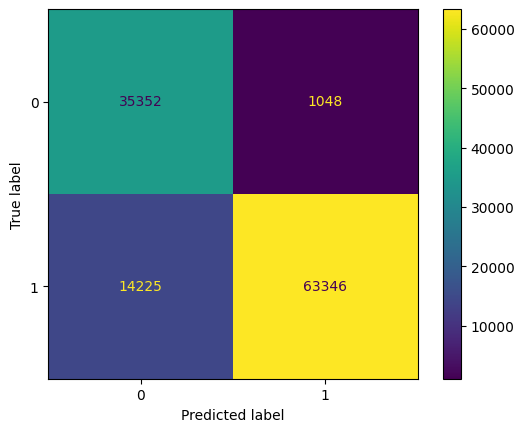

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score



# tn, fp, fn, tp = conf_matrix.ravel()
y_test_arg = y_test
conf_matrix = confusion_matrix(y_test_arg, y_hat)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
accuracy = accuracy_score(y_test_arg, y_hat)
precision_macro = precision_score(y_test_arg, y_hat, average='macro')
precision_micro = precision_score(y_test_arg, y_hat, average='micro')
precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
f1_macro = f1_score(y_test_arg, y_hat, average='macro')
f1_micro = f1_score(y_test_arg, y_hat, average='micro')
# auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Accuracy: {accuracy}")
print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
# print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

import pandas as pd
metrics = {
        "model" : "dnn",
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/UNSW/modeldnn.csv", mode='a', index=False)
